
# 2.logistic regression

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2','admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


e:\program files\python\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


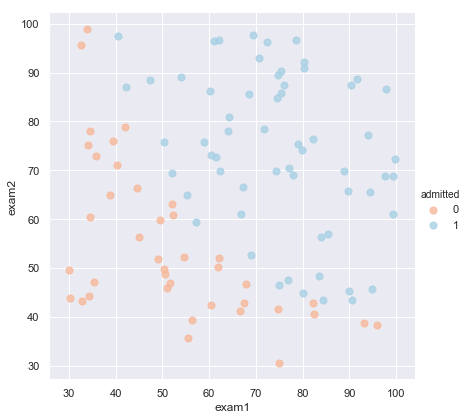

In [4]:
sns.set(context="notebook", style="darkgrid",palette=sns.color_palette("RdBu",2))
sns.lmplot('exam1','exam2',hue='admitted',data=data,
          size=6,
          fit_reg=False,
          scatter_kws={"s":50})
plt.show()

In [11]:
#读取特征
def get_X(df):
    ones = pd.DataFrame({'ones':np.ones(len(df))})#ones是m行1列的DataFrame
    data = pd.concat([ones, df], axis=1) #合并数据，根据列合并
    return data.iloc[:,:-1].as_matrix() #这个操作返回ndarray，不是矩阵

#读取标签
def get_y(df):
    return np.array(df.iloc[:,-1]) #df.iloc[:,-1]是指df的最后一列

def normalize_feature(df):
    return df.apply(lambda column:(column - column.mean())/column,std())#特征缩放



In [6]:
X= get_X(data)
print(X.shape)

y=get_y(data)
print(y.shape)

(100, 3)
(100,)


e:\program files\python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


# sigmoid函数

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

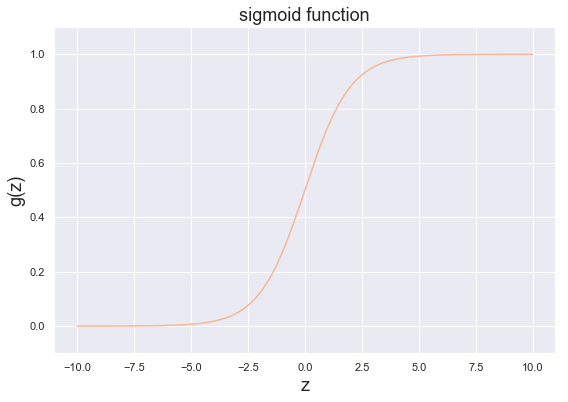

In [10]:
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(np.arange(-10, 10, step=0.01),
       sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1, 1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()


# cost function

In [22]:
theta =np.zeros(3) #so theta is shape(3*1)
print(theta)

[0. 0. 0.]


In [23]:
def cost(theta, X, y):
     return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))
# X @ theta与X.dot(theta)等价

In [24]:
cost(theta, X, y)

0.6931471805599453

# gradient descent（梯度下降）

In [27]:
# This is batch gradient descent
def gradient(theta, X, y):
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [26]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

# 拟合参数

In [29]:
import scipy.optimize as opt
# 使用scipy.optimize.minimize去寻找参数

In [30]:
res = opt.minimize(fun=cost, x0=theta, args=(X,y), method='Newton-CG', jac=gradient)
print(res)

     fun: 0.20349770159082373
     jac: array([-1.11232496e-05, -7.41503794e-04, -6.38123690e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 253
  status: 0
 success: True
       x: array([-25.16143003,   0.20623248,   0.20147238])


# 用训练集预测和验证

In [34]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [32]:
final_theta = res.x
y_pred = predict(X, final_theta)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



# 寻找决策边界

X @ theta = 0(This is the line)

In [33]:
print(res.x) # This is the final theta

[-25.16143003   0.20623248   0.20147238]


In [34]:
coef = -(res.x / res.x[2]) #find the equation
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1] * x

[124.88773847  -1.02362658  -1.        ]


In [35]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


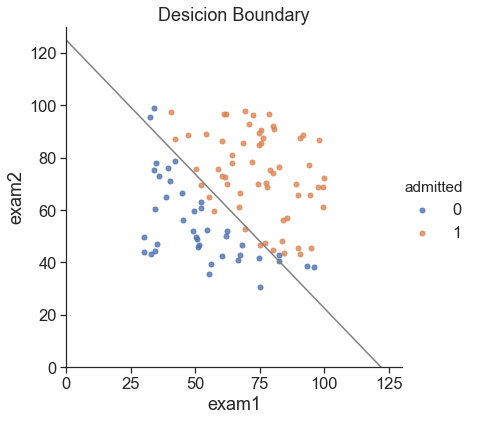

In [36]:
sns.set(context="notebook", style="ticks", font_scale=1.5)
sns.lmplot('exam1', 'exam2', hue='admitted', data=data,
          size=6,
          fit_reg=False,
          scatter_kws={"s":25}
          )
plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Desicion Boundary')
plt.show()

   ones
0   1.0
1   1.0
2   1.0


# 3-正则化逻辑回归

In [5]:
df = pd.read_csv('ex2data2.txt', names=['test1','test2','accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


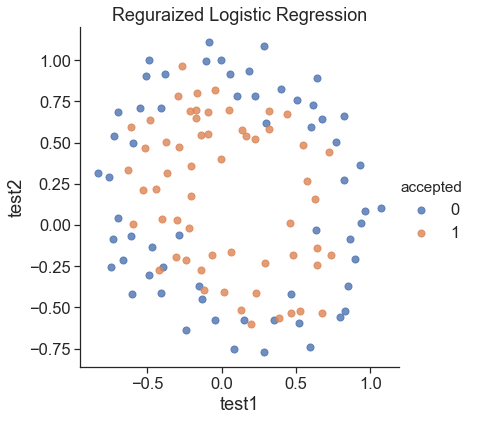

In [44]:
sns.set(context="notebook", style='ticks', font_scale=1.5)
sns.lmplot('test1', 'test2', hue='accepted', data=df,
          size=6,
          fit_reg=False,
          scatter_kws={"s":50}
          )
plt.title('Reguraized Logistic Regression')
plt.show()

# feature mapping(特征映射)

In [1]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {"f{}{}".format(i - p, p): np.power(x, i-p)*np.power(y, p)
           for i in np.arange(power + 1)
           for p in np.arange(i + 1)
           }
    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)

In [6]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [7]:
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [8]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


# regularized cost(正则代价函数)

In [12]:
theta = np.zeros(data.shape[1])
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = get_y(df)
print(y.shape)

(118, 28)
(118,)


e:\program files\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [21]:
def regularized_cost(theta, X, y, l=1):
    theta_jl_to_n = theta[1:]
    regularized_term = (1 / (2 * len(X))) * np.power(theta_jl_to_n, 2).sum()
    return cost(theta, X, y) + regularized_term

In [26]:
regularized_cost(theta, X, y, l=1)

0.6931471805599454

# regularized gradient(正则化梯度)

In [28]:
def regularized_gradient(theta, X, y, l=1):
    theta_j1_to_n = theta[1:]
    regularized_theta = (l / len(X)) * theta_j1_to_n
    # by doing this, no offset is on theta_0
    regularized_term = np.concatenate([np.array([0]), regularized_theta])

    return gradient(theta, X, y) + regularized_term
    

In [29]:
regularized_gradient(theta, X, y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

# 拟合参数

In [30]:
import scipy.optimize as opt

In [31]:
print('init cost = {}'.format(regularized_cost(theta, X, y)))

res = opt.minimize(fun=regularized_cost, x0=theta, args=(X,y), method='Newton-CG', jac=regularized_gradient)
res

init cost = 0.6931471805599454


     fun: 0.5290027297127226
     jac: array([-5.59000348e-08, -1.28838122e-08, -6.36410934e-08,  1.48052446e-08,
       -2.17946454e-09, -3.76148722e-08,  9.78876709e-09, -1.82798254e-08,
        1.13128886e-08, -1.07496536e-08,  9.72446799e-09, -3.07080137e-09,
       -8.99944467e-09,  3.95483551e-09, -2.61273742e-08,  4.27780929e-10,
       -1.11055205e-08, -6.79817860e-10, -5.00207423e-09,  2.66918207e-09,
       -1.42573657e-08,  2.66682830e-09, -3.70874575e-09, -1.41882519e-10,
       -1.24101649e-09, -1.53332708e-09,  3.89033012e-10, -2.18628962e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 68
  status: 0
 success: True
       x: array([ 1.27273933,  0.62527083,  1.18108774, -2.01995945, -0.91742379,
       -1.43166442,  0.12400731, -0.36553516, -0.35723847, -0.17512854,
       -1.45815594, -0.05098912, -0.61555563, -0.27470594, -1.19281681,
       -0.24218847, -0.20600683, -0.04473089, -0.27778458, -0.29537795,
       -0.4

# 预测

In [35]:
final_theta = res.x
y_pred = predict(X, final_theta)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



# 使用不同的λ(这是个常数) 画出决策边界

In [58]:
def draw_boundary(power, l):
    density = 1000
    threshhold = 2 * 10 ** -3
    final_theta = feature_mapped_logistic_regression(power, l)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)
    df = pd.read_csv('ex2data2.txt', names=['test1','test2','accepted'])
    sns.lmplot('test1','test2',hue='accepted', data=df,
              size=6,fit_reg=False,scatter_kws={"s":100})
    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

In [46]:
def feature_mapped_logistic_regression(power, l):
    #power : int
    #     raise x1, x2 to polynomial power
    #l : int
    #  lambda constant for regularization term
    df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepter'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)
    
    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])
    
    res = opt.minimize(fun=regularized_cost,
                      x0=theta,
                      args=(X, y, l),
                      method='TNC',
                      jac=regularized_gradient)
    final_theta = res.x
    return final_theta

In [54]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)
    
    cordinates = [(x,y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)
    inner_product = mapped_cord.as_matrix() @ theta
    decision = mapped_cord[np.abs(inner_product) < threshhold]
    
    return decision.f10, decision.f01

e:\program files\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
e:\program files\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
e:\program files\python\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


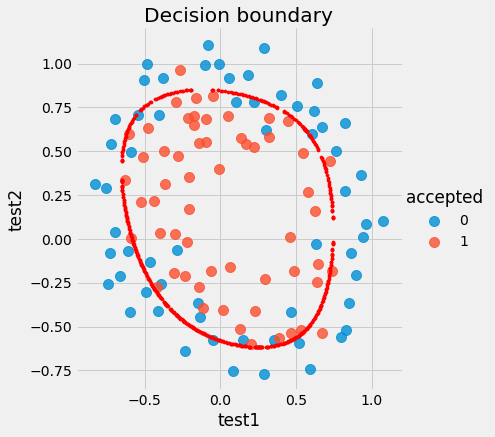

In [55]:
draw_boundary(power=6, l=1)

e:\program files\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
e:\program files\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


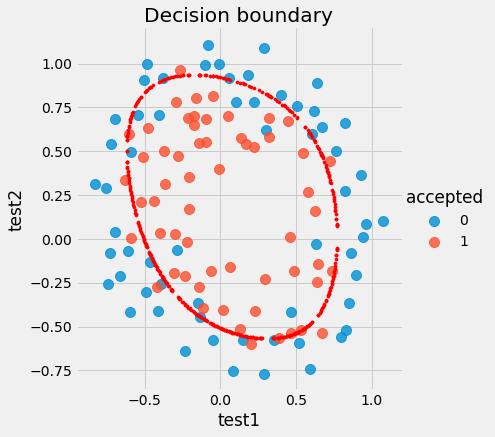

In [63]:
draw_boundary(power=6, l=0) #no regularization, over fitting

e:\program files\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
e:\program files\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


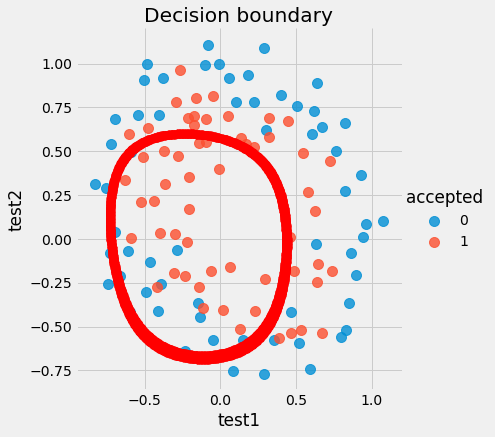

In [62]:
draw_boundary(power=6, l=100)  # underfitting，#lambda=100